In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
nfl_df = pd.read_csv('../data/nfl_elo.csv')

In [3]:
nfl_df.shape

(16810, 30)

In [4]:
nfl_df.columns

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre',
       'qb2_value_pre', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2',
       'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post',
       'qbelo1_post', 'qbelo2_post', 'score1', 'score2'],
      dtype='object')

# Question 1
* How does Tom Brady's elo rating differ before, during, and after home games? 

### Process
* 1) Isolate the dataframe to include only Tom Brady's home games (when he appears as QB1)
* 2) only use columns: qb1_value_pre, qb1_game_value, qb1_value_post
* 3) Use data time index
* 4) graph data with year on x axis and score on y axis

In [5]:
cols_to_use = ['date', 'qb1', 'qb1_value_pre', 'qb1_game_value', 'qb1_value_post']
brady_df = nfl_df[cols_to_use]
brady_df.sample(10)

,date,qb1,qb1_value_pre,qb1_game_value,qb1_value_post
9597,1993-11-08,Dave Krieg,17.684583,-21.498889,13.766235
6379,1979-09-30,Pat Haden,84.065475,136.186468,89.277574
16461,2019-12-01,Kyler Murray,178.226151,-12.212436,159.182292
2283,1951-11-11,Frankie Albert,56.748902,45.889478,55.662960
11446,2000-12-17,Jeff Garcia,226.875119,321.516220,236.339229
14542,2012-11-11,Drew Brees,271.457814,244.792454,268.791278
12474,2004-12-12,Ben Roethlisberger,111.000889,-82.415653,91.659235
14296,2011-11-20,Alex Smith,118.583145,180.584931,124.783324
11758,2002-09-15,Chris Redman,72.023259,-99.819335,54.839000
6938,1981-11-15,Doug Williams,112.673270,-64.622482,94.943695


In [6]:
brady_filter = brady_df['qb1'] == 'Tom Brady'

In [7]:
brady_df = brady_df[brady_filter]
brady_df.sample(10)

,date,qb1,qb1_value_pre,qb1_game_value,qb1_value_post
11615,2001-11-18,Tom Brady,50.103762,52.891022,50.382488
12872,2006-10-08,Tom Brady,142.316188,108.160707,138.900640
14206,2011-10-09,Tom Brady,248.882271,188.347506,242.828795
12531,2005-01-16,Tom Brady,142.402030,112.977371,139.459564
14868,2013-12-08,Tom Brady,188.356100,204.808338,190.001324
14837,2013-11-24,Tom Brady,160.314567,307.707929,175.053903
14027,2010-11-21,Tom Brady,195.106294,192.844182,194.880083
14984,2014-09-21,Tom Brady,152.854939,112.052184,148.774663
16006,2018-02-04,Tom Brady,220.303005,439.735993,242.246304
14297,2011-11-21,Tom Brady,238.573953,144.087732,229.125331


In [8]:
brady_df['date_dt']=pd.to_datetime(nfl_df['date'])
brady_df=brady_df.set_index('date_dt')
brady_df = brady_df[['qb1', 'qb1_value_pre', 'qb1_value_post']]
brady_df.sample(10)


,qb1,qb1_value_pre,qb1_value_post
date_dt,,,
2009-10-04,Tom Brady,207.581068,209.408535
2016-12-24,Tom Brady,235.886946,234.635886
2011-10-09,Tom Brady,248.882271,242.828795
2003-12-27,Tom Brady,122.919562,141.119331
2009-12-13,Tom Brady,227.005587,216.016808
2003-09-21,Tom Brady,92.696132,85.688228
2013-10-27,Tom Brady,142.253045,126.083487
2018-09-09,Tom Brady,242.246304,239.845679
2011-11-06,Tom Brady,228.175313,220.880887


In [9]:
#To isolate 2020 dates
#brady_df.loc['2020']
#create a filter to exclude index items where the year is 2020
not2020_filter = brady_df.index.year!=2020 
brady_df = brady_df[not2020_filter]
not2021_filter = brady_df.index.year!=2021
brady_df = brady_df[not2021_filter]
brady_df
new_brady_df = brady_df[['qb1', 'qb1_value_post']]
new_brady_df

,qb1,qb1_value_post
date_dt,,
2001-09-30,Tom Brady,25.221796
2001-10-14,Tom Brady,39.651904
2001-11-11,Tom Brady,50.103762
2001-11-18,Tom Brady,50.382488
2001-11-25,Tom Brady,71.717628
...,...,...
2019-10-27,Tom Brady,212.921438
2019-11-24,Tom Brady,179.665697
2019-12-08,Tom Brady,161.279956


In [10]:
my_colors = ['b', 'r']
brady_plot = new_brady_df.plot(xlabel="Year of Game", ylabel = "Elo Rating", title="Brady's Home Post Game Elo Value Over Time", color='#33238c', figsize = (12,4), legend=False)
brady_plot

<AxesSubplot:title={'center':"Brady's Home Post Game Elo Value Over Time"}, xlabel='Year of Game', ylabel='Elo Rating'>

In [11]:
brady_pre_mean = brady_df['qb1_value_pre'].mean()
brady_post_mean = brady_df['qb1_value_post'].mean()
print(brady_pre_mean, brady_post_mean)

190.6756028098438 192.00682345688367


###  Observations
* From the graph, it appears that Bbrady's elo rating has improved over time
* The peaks in the graph are around Super Bowl wins

### Follow Up
* I would like to figure out how to isolate this data to a smaller set of years (where he was starting and at his prime), as this graph is a little hard to read
* In addition, I want to pick which of these rankings best describes his overall performance and compare it to his away game performance (question 2)

# Question 2
* How does Tom Brady's elo rating differ during games whether he is at home or away?

### Process
* 1) Convert date column 
* 2) Filter data to inclue only necessary columns
* 3) Filter dataframe to include TB in QB1 or QB2 columns
* 4) merge columns into new one where Brady played
* 5) Graph both values to see whether home or away games produced different values


In [12]:
brady_df2 = nfl_df
brady_df2['date_dt']=pd.to_datetime(brady_df2['date'])
brady_df2=brady_df2.set_index('date_dt')
cols_to_use = ['qb1', 'qb2', 'qb1_value_post', 'qb2_value_post']

brady_df2 = brady_df2[cols_to_use]
brady_df2.sample(10)

,qb1,qb2,qb1_value_post,qb2_value_post
date_dt,,,,
1967-09-17,Ron Vander Kelen,John Brodie,8.994163,103.585369
2007-12-16,Cleo Lemon,Kyle Boller,51.295357,66.107603
1932-12-18,NaN,NaN,NaN,NaN
2018-11-11,Derek Carr,Philip Rivers,150.488849,213.403635
1981-10-04,Ken Stabler,Ken Anderson,18.361585,119.879133
1973-11-25,Archie Manning,John Hadl,105.978769,99.567440
2016-01-09,A.J. McCarron,Ben Roethlisberger,56.732572,201.309202
1953-10-04,Y.A. Tittle,Norm Van Brocklin,46.741065,102.844427
1995-11-19,Eric Zeier,Brett Favre,25.718723,167.129564


In [13]:
not2020_filter = brady_df2.index.year!=2020 
brady_df2 = brady_df2[not2020_filter]
not2021_filter = brady_df2.index.year!=2021
brady_df2 = brady_df2[not2021_filter]
brady_df2

,qb1,qb2,qb1_value_post,qb2_value_post
date_dt,,,,
1920-09-26,NaN,NaN,NaN,NaN
1920-10-03,NaN,NaN,NaN,NaN
1920-10-03,NaN,NaN,NaN,NaN
1920-10-03,NaN,NaN,NaN,NaN
1920-10-03,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-12-29,Drew Lock,Derek Carr,113.111386,189.272692
2019-12-29,Gardner Minshew,Jacoby Brissett,109.795052,114.762705
2019-12-29,Trace McSorley,Devlin Hodges,26.662641,18.763469


In [14]:
brady_filter2 = (brady_df2['qb1'] == 'Tom Brady') | (brady_df2['qb2'] == 'Tom Brady')
brady_df2 = brady_df2[brady_filter2]
brady_df2

,qb1,qb2,qb1_value_post,qb2_value_post
date_dt,,,,
2001-09-30,Tom Brady,Peyton Manning,25.221796,177.254974
2001-10-07,Jay Fiedler,Tom Brady,76.531662,15.875484
2001-10-14,Tom Brady,Doug Flutie,39.651904,124.762031
2001-10-21,Peyton Manning,Tom Brady,173.240930,63.528755
2001-10-28,Brian Griese,Tom Brady,118.024067,56.569110
...,...,...,...,...
2019-12-01,Deshaun Watson,Tom Brady,216.133452,175.035914
2019-12-08,Tom Brady,Patrick Mahomes,161.279956,245.004986
2019-12-15,Andy Dalton,Tom Brady,105.222476,148.721327


In [15]:
# do an np.where, set to null if qb is not brady
# use dt index to aggregate to year
# resample by y for year, and take mean of the columns resample(year, mean)

brady_df2['brady_home_value'] = np.where(brady_df2['qb1'] == 'Tom Brady', brady_df2['qb1_value_post'], None) #choose rows where brady is QB1 or QB2, using np.where
brady_df2['brady_away_value'] = np.where(brady_df2['qb2'] == 'Tom Brady', brady_df2['qb2_value_post'], None)
brady_df2

,qb1,qb2,qb1_value_post,qb2_value_post,brady_home_value,brady_away_value
date_dt,,,,,,
2001-09-30,Tom Brady,Peyton Manning,25.221796,177.254974,25.2218,None
2001-10-07,Jay Fiedler,Tom Brady,76.531662,15.875484,None,15.8755
2001-10-14,Tom Brady,Doug Flutie,39.651904,124.762031,39.6519,None
2001-10-21,Peyton Manning,Tom Brady,173.240930,63.528755,None,63.5288
2001-10-28,Brian Griese,Tom Brady,118.024067,56.569110,None,56.5691
...,...,...,...,...,...,...
2019-12-01,Deshaun Watson,Tom Brady,216.133452,175.035914,None,175.036
2019-12-08,Tom Brady,Patrick Mahomes,161.279956,245.004986,161.28,None
2019-12-15,Andy Dalton,Tom Brady,105.222476,148.721327,None,148.721


In [16]:
brady_df2['brady_home_value']=brady_df2['brady_home_value'].astype(float)
brady_df2['brady_away_value']=brady_df2['brady_away_value'].astype(float)

cols_to_use = ['brady_home_value', 'brady_away_value']


brady_home_away_df = brady_df2.resample('12M')[cols_to_use].mean()
brady_home_away_df

,brady_home_value,brady_away_value
date_dt,,
2001-09-30,25.221796,NaN
2002-09-30,70.847715,72.619933
2003-09-30,111.683910,115.120109
2004-09-30,123.117934,121.068231
2005-09-30,141.166323,141.087783
2006-09-30,160.543851,163.136219
2007-09-30,149.655849,142.989706
2008-09-30,256.095363,251.070435
2009-09-30,217.759925,208.486117


<AxesSubplot:title={'center':"Tom Brady's Home vs. Away Performance Over Time"}, xlabel='Year', ylabel='Post Game Elo Rating'>

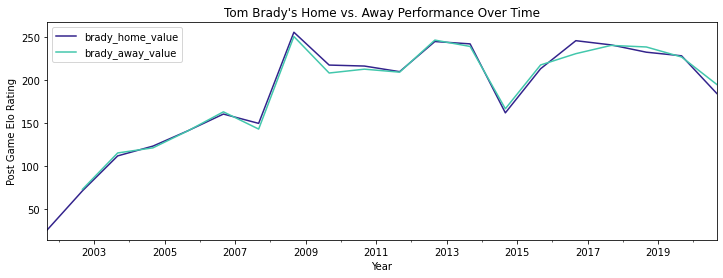

In [17]:
my_colors = [ '#33238c', '#42c7ac']
brady_home_away_df.plot(title="Tom Brady's Home vs. Away Performance Over Time", xlabel = "Year", ylabel = "Post Game Elo Rating", figsize = (12, 4), color=my_colors)

In [18]:
brady_home_mean = brady_home_away_df['brady_home_value'].mean()
brady_away_mean = brady_home_away_df['brady_away_value'].mean()
print(brady_home_mean, brady_away_mean)

183.97072727419715 191.68834098942074


### Observations
- Predicted that his home performance would be better 
- Later in his career, his away performance seemed higher
    - Could be due to increased comfort in playing in various stadiums
- What does a bad QB's difference look like?

In [19]:
eli_df = nfl_df
eli_df['date_dt']=pd.to_datetime(eli_df['date'])
eli_df=eli_df.set_index('date_dt')
cols_to_use = ['qb1', 'qb2', 'qb1_value_post', 'qb2_value_post']
eli_df = eli_df[cols_to_use]
eli_df

,qb1,qb2,qb1_value_post,qb2_value_post
date_dt,,,,
1920-09-26,NaN,NaN,NaN,NaN
1920-10-03,NaN,NaN,NaN,NaN
1920-10-03,NaN,NaN,NaN,NaN
1920-10-03,NaN,NaN,NaN,NaN
1920-10-03,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-01-17,NaN,NaN,NaN,NaN
2021-01-17,NaN,NaN,NaN,NaN
2021-01-24,NaN,NaN,NaN,NaN


In [20]:
eli_filter = (eli_df['qb1'] == 'Eli Manning') | (eli_df['qb2'] == 'Eli Manning')
eli_df = eli_df[eli_filter]

In [21]:
eli_df['eli_home_value'] = np.where(eli_df['qb1'] == 'Eli Manning', eli_df['qb1_value_post'], None) #choose rows where brady is QB1 or QB2, using np.where
eli_df['eli_away_value'] = np.where(eli_df['qb2'] == 'Eli Manning', eli_df['qb2_value_post'], None)

eli_df['eli_home_value']=eli_df['eli_home_value'].astype(float)
eli_df['eli_away_value']=eli_df['eli_away_value'].astype(float)

cols_to_use = ['eli_home_value', 'eli_away_value']


eli_df = eli_df.resample('12M')[cols_to_use].mean()
eli_df

,eli_home_value,eli_away_value
date_dt,,
2004-11-30,79.487063,NaN
2005-11-30,72.757279,70.712758
2006-11-30,80.027210,83.608459
2007-11-30,88.155215,90.121491
2008-11-30,98.318114,95.546955
2009-11-30,113.654182,116.871926
2010-11-30,140.178861,143.833330
2011-11-30,149.684886,151.460604
2012-11-30,178.684939,181.380484


<AxesSubplot:title={'center':"Eli Manning's Home vs. Away Performance Over Time"}, xlabel='Year', ylabel='Post Game Elo Rating'>

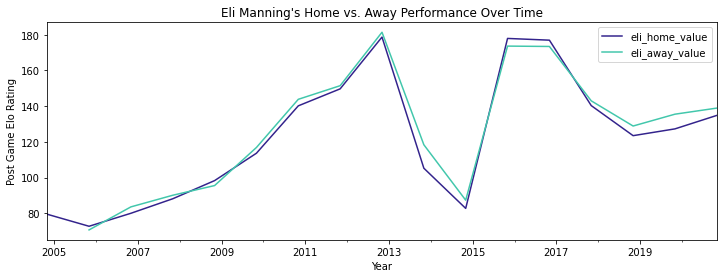

In [22]:
eli_df.plot(title="Eli Manning's Home vs. Away Performance Over Time", xlabel = "Year", ylabel = "Post Game Elo Rating", figsize = (12, 4), color=my_colors)

In [23]:
eli_home_mean = eli_df['eli_home_value'].mean()
eli_away_mean = eli_df['eli_away_value'].mean()
print(eli_home_mean, eli_away_mean)

121.74785543652081 127.0375158847892


### Observations
- Eli Manning has a similar trend,  where away is  better
- However this is only one quarterback as a comparison point
- Will be better to compare against other  highly rated Quarterbacks